<a href="https://colab.research.google.com/github/sbhosale0701/CodeCluase_GoldenProject1-BlindnessDetection/blob/main/GoldenProject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Golden Task - Blindness Detection

In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection


403 - Forbidden


In [ ]:
! kaggle competitions download -c aptos2019-blindness-detection

100% 9.50G/9.51G [01:06<00:00, 212MB/s]
100% 9.51G/9.51G [01:06<00:00, 154MB/s]


In [ ]:
! unzip aptos2019-blindness-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: test_images/512beaada8f0.png  
  inflating: test_images/51323e9d2070.png  
  inflating: test_images/515675001b9e.png  
  inflating: test_images/515877da2def.png  
  inflating: test_images/5168ddccea88.png  
  inflating: test_images/5172c056a687.png  
  inflating: test_images/5177461f5339.png  
  inflating: test_images/51910bcb980d.png  
  inflating: test_images/51a3e9b6a1c0.png  
  inflating: test_images/51bbd82feec8.png  
  inflating: test_images/51de5fb8eccd.png  
  inflating: test_images/51e88694c81f.png  
  inflating: test_images/51f0bf8f1544.png  
  inflating: test_images/51f57fb32840.png  
  inflating: test_images/51fa42dc1415.png  
  inflating: test_images/5276ab33b7b0.png  
  inflating: test_images/52a353760f72.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/5325b1c22c61.png  
  inflating: test_images/53959e0a750b.png  
  inflating: test_images/53be22c72713.png  
  inflating: test_images/

In [ ]:
import cv2;
import matplotlib.pyplot as plt
import numpy as np;
import pandas as pd
from random import shuffle;
import cv2;
from random import shuffle;
from tqdm import tqdm;
import tensorflow;
from keras import layers;
from keras import Model;
from keras.optimizers import SGD;
from keras.callbacks import TensorBoard;
IMAGE_SIZE = 300;


In [ ]:
! pip3 install keras

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
train_Data_X_File = drive.CreateFile({'id': '1IJRvy-hV3sgEzjJVMnAtieeaASnjClZ1'});
train_Data_Y_File = drive.CreateFile({'id': '1_flYvBAJCp-vP0lYWkAEH3NgkS6Oqa9W'});

In [ ]:

train_Data_X_File.GetContentFile('train_Data_X.npy');
train_Data_X = np.load('train_Data_X.npy', allow_pickle=True)

train_Data_Y_File.GetContentFile('train_Data_Y.npy');
train_Data_Y = np.load('train_Data_Y.npy', allow_pickle=True)

train_Data_X.shape

(3662, 1, 300, 300, 3)

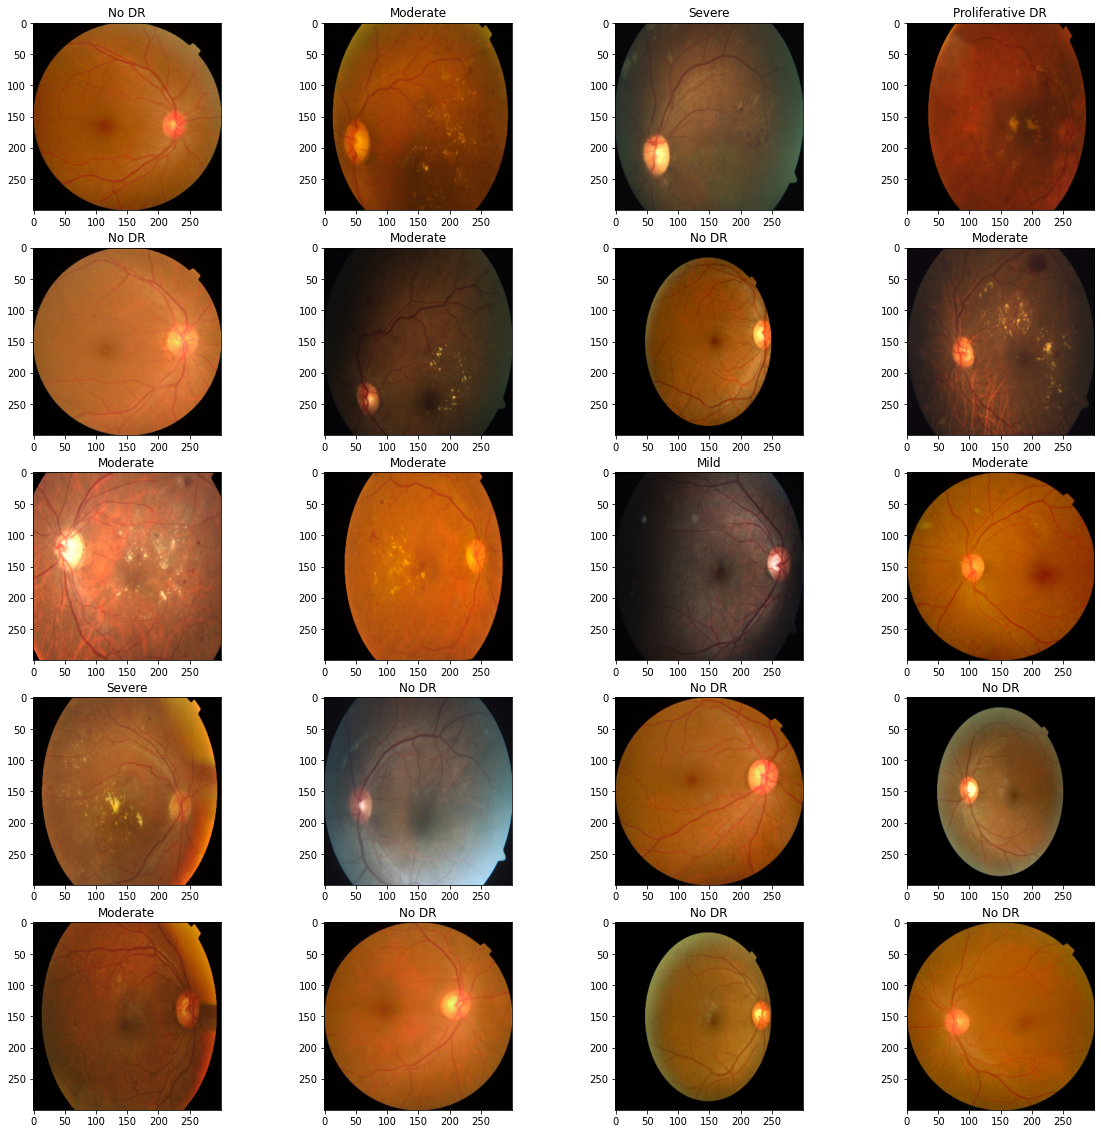

In [ ]:

count = 0;
Num_of_Images = 20;
plt.figure(figsize=(20,20))
label = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'];
for i in np.random.randint(1000, size = Num_of_Images):
  count = count+1;
  plt.subplot(Num_of_Images/4,4, count);
  plt.imshow(np.reshape(train_Data_X[i],(IMAGE_SIZE,IMAGE_SIZE,3)));
  plt.title(label[int(train_Data_Y[i])]);

In [ ]:

num_of_Rows = train_Data_X.shape[0];
num_of_columns = train_Data_X.shape[1];
training_X = train_Data_X[:int(np.round(num_of_Rows*0.8))]
testing_X = train_Data_X[int(np.round(num_of_Rows*0.8)):]
training_Y = train_Data_Y[:int(np.round(num_of_Rows*0.8))]
testing_Y = train_Data_Y[int(np.round(num_of_Rows*0.8)):]


In [ ]:

img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [ ]:

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

In [ ]:

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:

x = layers.Flatten()(x)

In [ ]:

x = layers.Dense(512, activation='relu')(x)

In [ ]:

output = layers.Dense(5, activation='softmax')(x)

In [ ]:

model = Model(img_input, output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        1849

In [ ]:

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.00005),metrics=['acc']);

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

X_train = np.array([i[0] for i in tqdm(training_X)]);
Y_train = np.array([i[0] for i in training_Y]);

X_test = np.array([i[0] for i in tqdm(testing_X)]);
Y_test = np.array([i[0] for i in testing_Y]);

X_train.shape

100%|██████████| 732/732 [00:00<00:00, 374372.70it/s]


(2930, 300, 300, 3)

In [ ]:

Model_fit = model.fit(X_train,Y_train, batch_size =64, epochs = 10,verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
46/46 [==============================] - 304s 7s/step - loss: 9.6636 - acc: 0.5379 - val_loss: 1.1757 - val_acc: 0.6120
Epoch 2/10
46/46 [==============================] - 300s 7s/step - loss: 0.9303 - acc: 0.6843 - val_loss: 0.8338 - val_acc: 0.6899
Epoch 3/10
46/46 [==============================] - 295s 6s/step - loss: 0.7683 - acc: 0.7225 - val_loss: 0.8634 - val_acc: 0.7309
Epoch 4/10
46/46 [==============================] - 297s 6s/step - loss: 0.6932 - acc: 0.7474 - val_loss: 0.8250 - val_acc: 0.7077
Epoch 5/10
46/46 [==============================] - 299s 7s/step - loss: 0.6717 - acc: 0.7625 - val_loss: 0.8362 - val_acc: 0.6995
Epoch 6/10
46/46 [==============================] - 293s 6s/step - loss: 0.6177 - acc: 0.7747 - val_loss: 0.8383 - val_acc: 0.7240
Epoch 7/10
46/46 [==============================] - 292s 6s/step - loss: 0.5838 - acc: 0.7894 - val_loss: 0.8603 - val_acc: 0.6899
Epoch 8/10
46/46 [==============================] - 295s 6s/step - loss: 0.5221 - a

In [ ]:

Marks=model.evaluate(X_test,Y_test,verbose=0)
print('Test Accuracy percentage:',100*Marks[1],"%")
print('Test Loss percentage:',100*Marks[0],"%")

Test Accuracy percentage: 68.44262480735779 %
Test Loss percentage: 91.14912152290344 %


In [ ]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 60ms/step


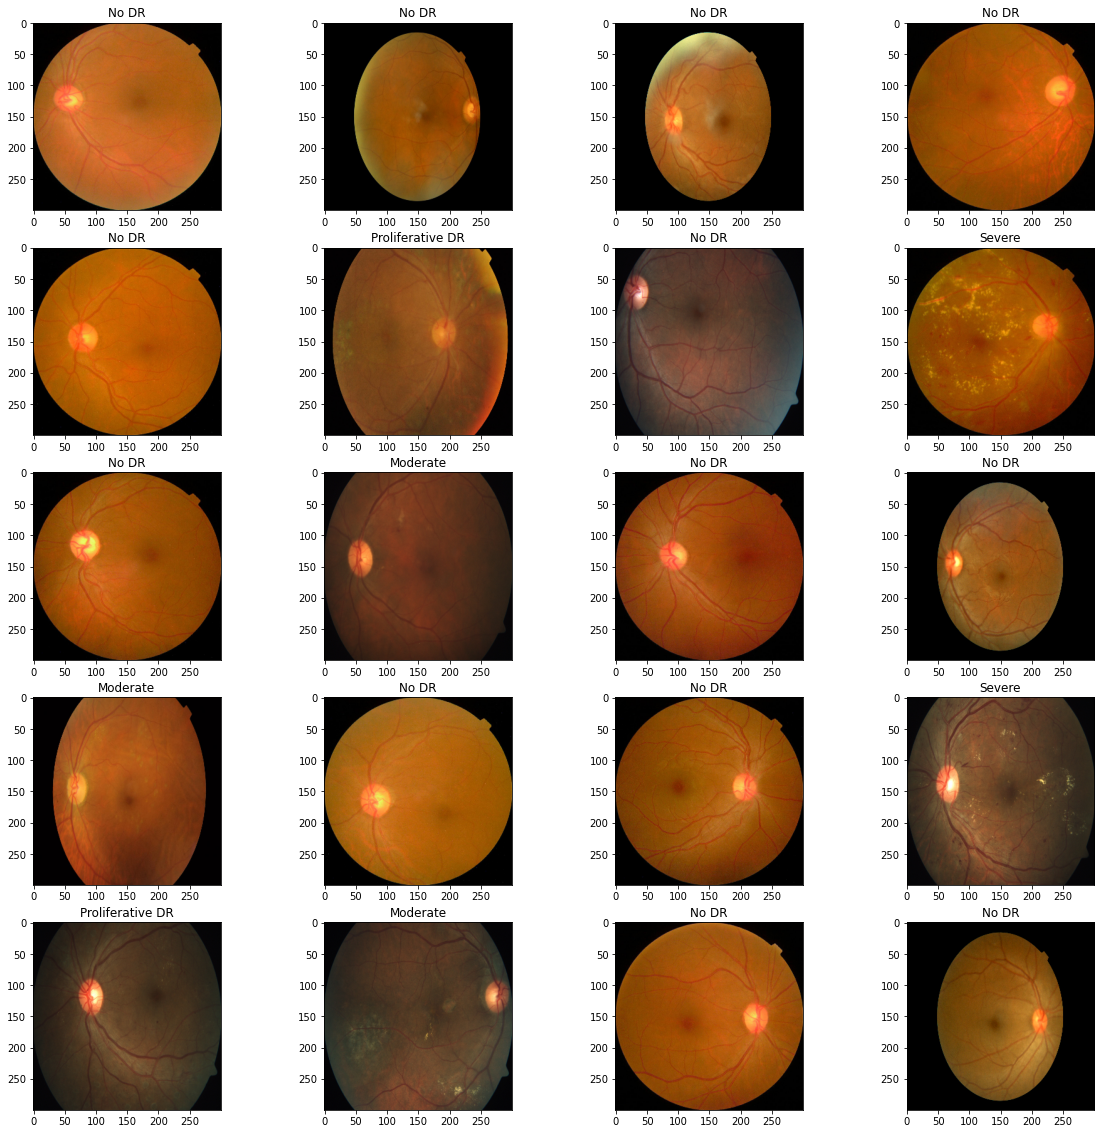

In [ ]:

count=0;
Num_of_Images=20;
plt.figure(figsize=(20,20))
label=['No DR','Mild','Moderate','Severe','Proliferative DR'];
for i in np.random.randint(500,size=Num_of_Images):
  count=count+1;
  plt.subplot(Num_of_Images/4,4, count);
  plt.imshow(np.reshape(X_test[i],(IMAGE_SIZE,IMAGE_SIZE,3)));
  P = model.predict(X_test[i].reshape(1,IMAGE_SIZE,IMAGE_SIZE,3)) # Prediction of testing images
  P=np.array(P);
  plt.title(label[int(Y_test[i])]);

In [ ]:

acc=Model_fit.history['acc']
val_acc=Model_fit.history['val_acc']
loss=Model_fit.history['loss']
val_loss=Model_fit.history['val_loss']
epochs=range(1,len(acc)+1)

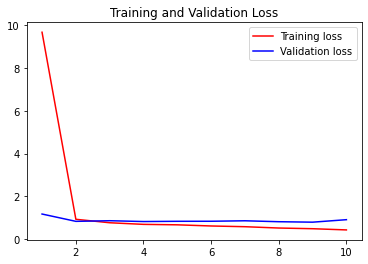

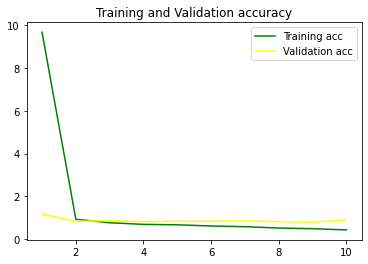

In [ ]:

plt.figure()
plt.title('Training and Validation Loss')
plt.plot(epochs,loss,'red',label='Training loss')
plt.plot(epochs,val_loss,'blue',label='Validation loss')
plt.legend()


plt.figure()
plt.title('Training and Validation accuracy')
plt.plot(epochs,loss,'green',label='Training acc')
plt.plot(epochs,val_loss,'yellow',label='Validation acc')

plt.legend()
plt.show()

